In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Path to SledgeHAMR top directory
sys.path.append('../../')
import pySledgehamr as sledgehamr

### Create Initial State

In [3]:
strings = sledgehamr.AxionStrings()
#strings.CreateInitialState(L=23, N=128, k_max=5, t_start=0.1, output_file='initial_state.hdf5') 

### Read Output

In [4]:
out = sledgehamr.Output('output')

print()

times = out.GetTimesOfSlices()
print('Slices written at \tt =', times)

times = out.GetTimesOfCoarseBoxes()
print('Coarse boxes written at t =', times)

times = out.GetTimesOfFullBoxes()
print('Full boxes written at \tt =', times)

times = out.GetTimesOfProjections()
print('Projections written at \tt =', times)

times = out.GetTimesOfSpectra()
print('Spectra written at \tt =', times)

times = out.GetTimesOfSlicesTruncationError()
print('Slices of truncation errors written at \t\tt =', times)

times = out.GetTimesOfCoarseBoxesTruncationError()
print('Coarse boxes of truncation errors written at \tt =', times)

times = out.GetTimesOfFullBoxesTruncationError()
print('Full boxes of truncation errors written at \tt =', times)

Number of slices found: 6
Number of coarse boxes found: 6
Number of full boxes found: 6
Number of projections found: 6
Number of spectra found: 2
Number of slices of truncation errors found: 2
Number of coarse boxes of truncation errors found: 2
Number of full boxes of truncation errors found: 2

Slices written at 	t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Coarse boxes written at t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Full boxes written at 	t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Projections written at 	t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125 2.52578125]
Spectra written at 	t = [2.31484375 2.52578125]
Slices of truncation errors written at 		t = [1.50625 2.06875]
Coarse boxes of truncation errors written at 	t = [1.50625 2.06875]
Full boxes of truncation errors written at 	t = [1.50625 2.06875]


## Plot Slice

t=2.24453125


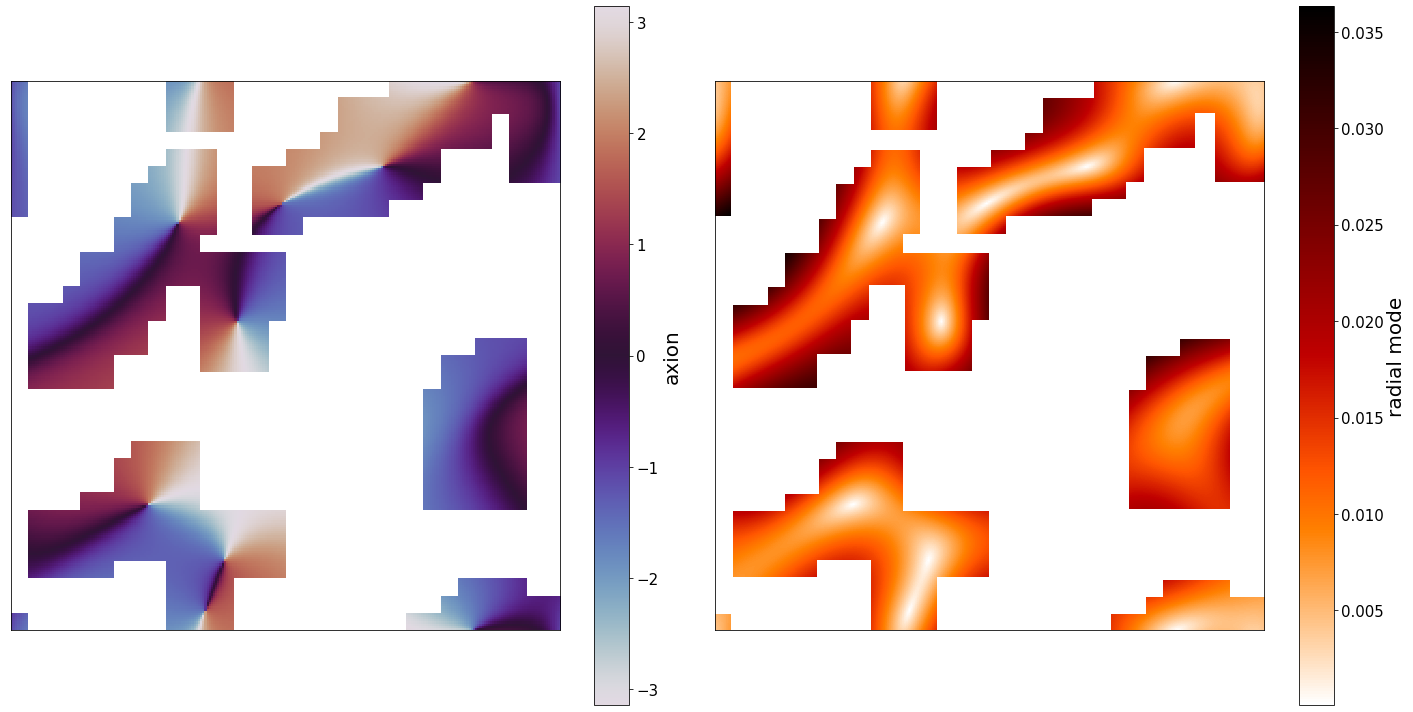

In [5]:
# id of slice to be plotted
i = 4
lev = 1

# Read a slice along the x-axis.
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load coarse box and plot a slice.

t=2.24453125


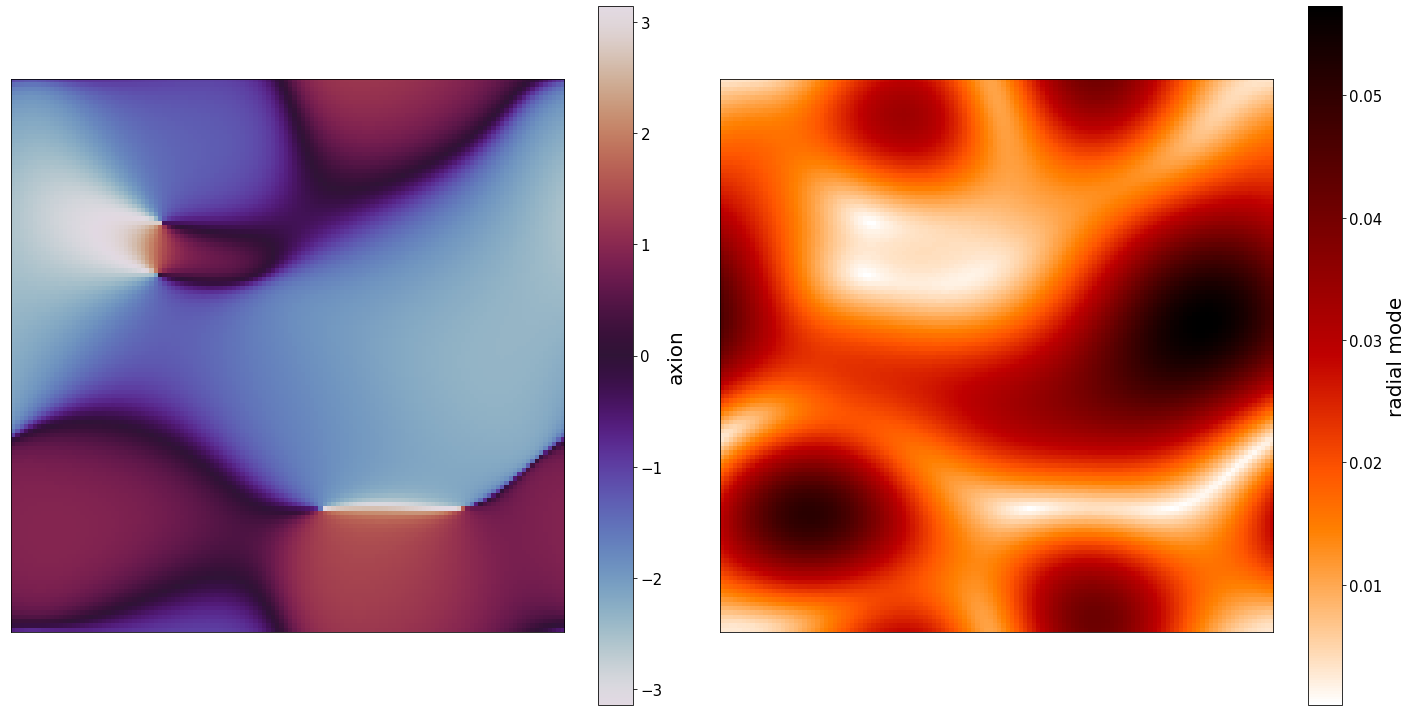

In [6]:
# Id of coarse box to be plotted
i = 4

# Read coarse box and grab a slice.
coarse_box = out.GetCoarseBox(i, ['Psi1', 'Psi2'])
t = coarse_box['t']
print('t='+str(t))

axion = np.arctan2(coarse_box['Psi2'][:,:,0], coarse_box['Psi1'][:,:,0])
radial_mode = np.sqrt(coarse_box['Psi1'][:,:,0]**2 + coarse_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Load a full box (at a finer level) and plot a slice.

t=1.7171875


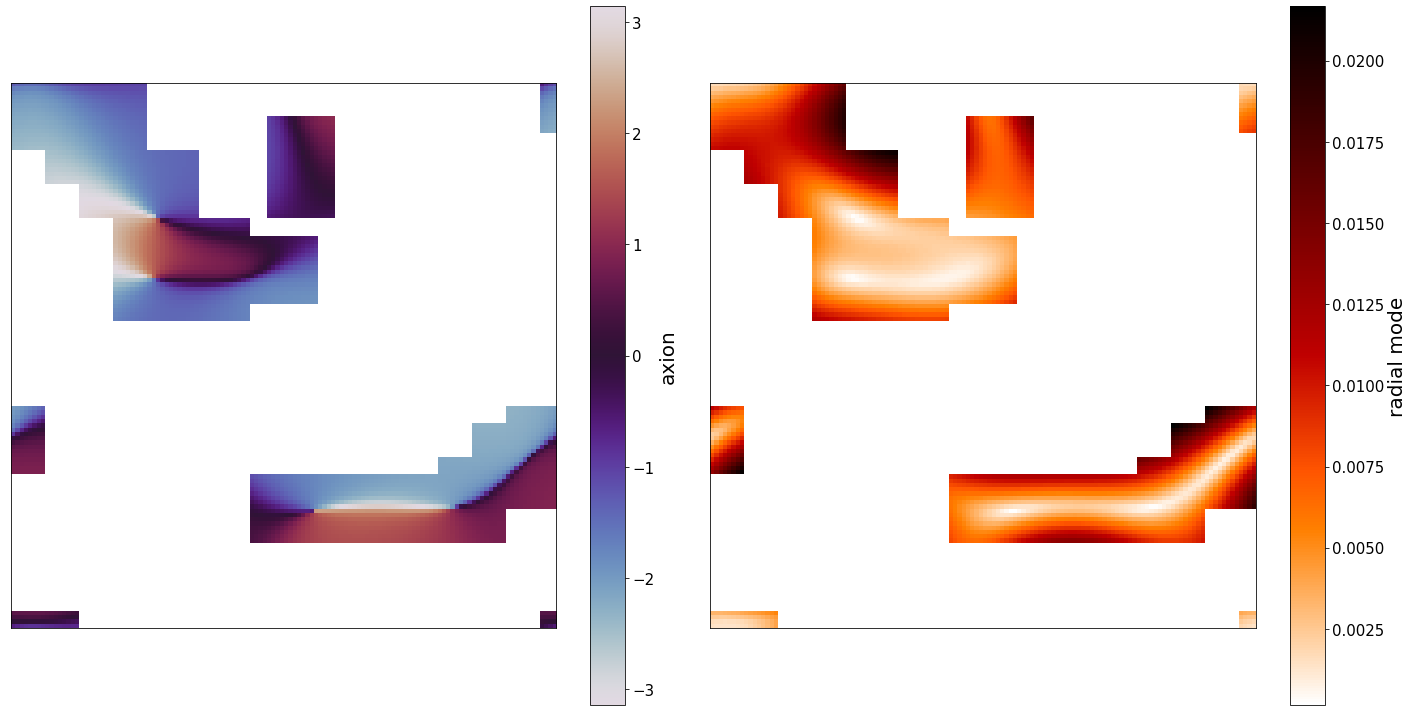

In [7]:
# Id of coarse box to be plotted
i = 3
level = 1

# Read coarse box and grab a slice. This output has been downsampled (see output.full_box_downsample_factor = 2)
full_box = out.GetFullBox(i, level, ['Psi1', 'Psi2'])
t = full_box['t']
print('t='+str(t))

axion = np.arctan2(full_box['Psi2'][:,:,0], full_box['Psi1'][:,:,0])
radial_mode = np.sqrt(full_box['Psi1'][:,:,0]**2 + full_box['Psi2'][:,:,0]**2)

strings.PlotAxionAndRadialModeSlice(axion, radial_mode)

## Plot slice of truncation errors

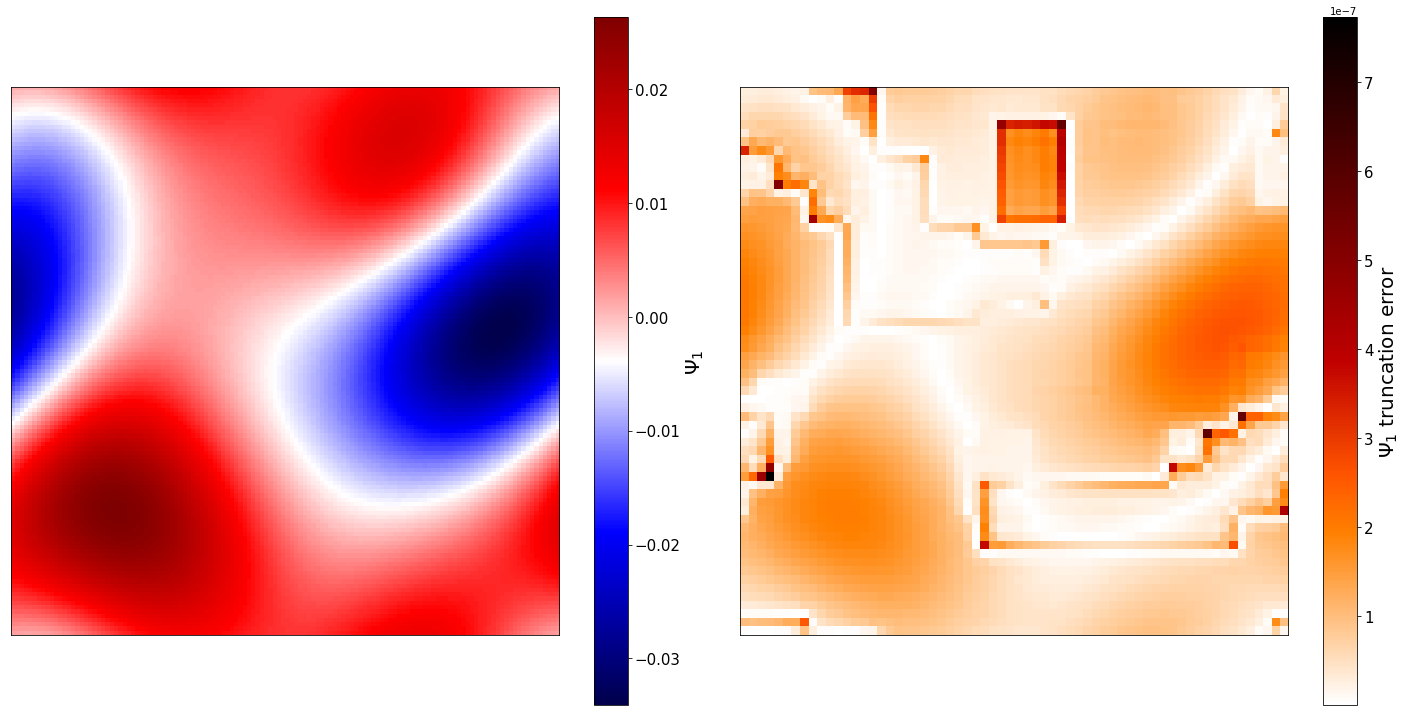

In [8]:
# Id of slice to be plotted.
i = 1
lev = 0

# Read a slice along the x-axis.
slices = out.GetSliceTruncationError(i, 'z', lev, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

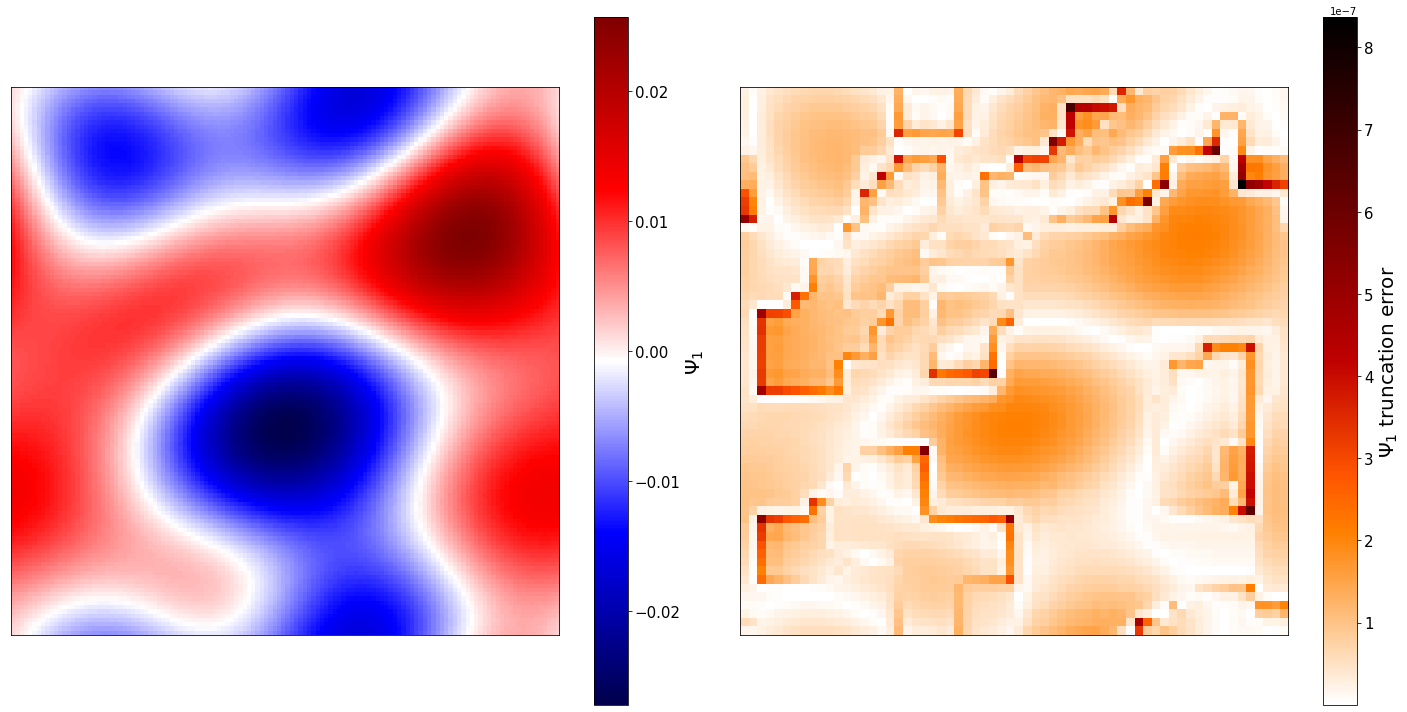

In [9]:
# Id of slice to be plotted.
i = 1

# Read a slice along the x-axis.
slices = out.GetCoarseBoxTruncationError(i, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'][0], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'][0], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

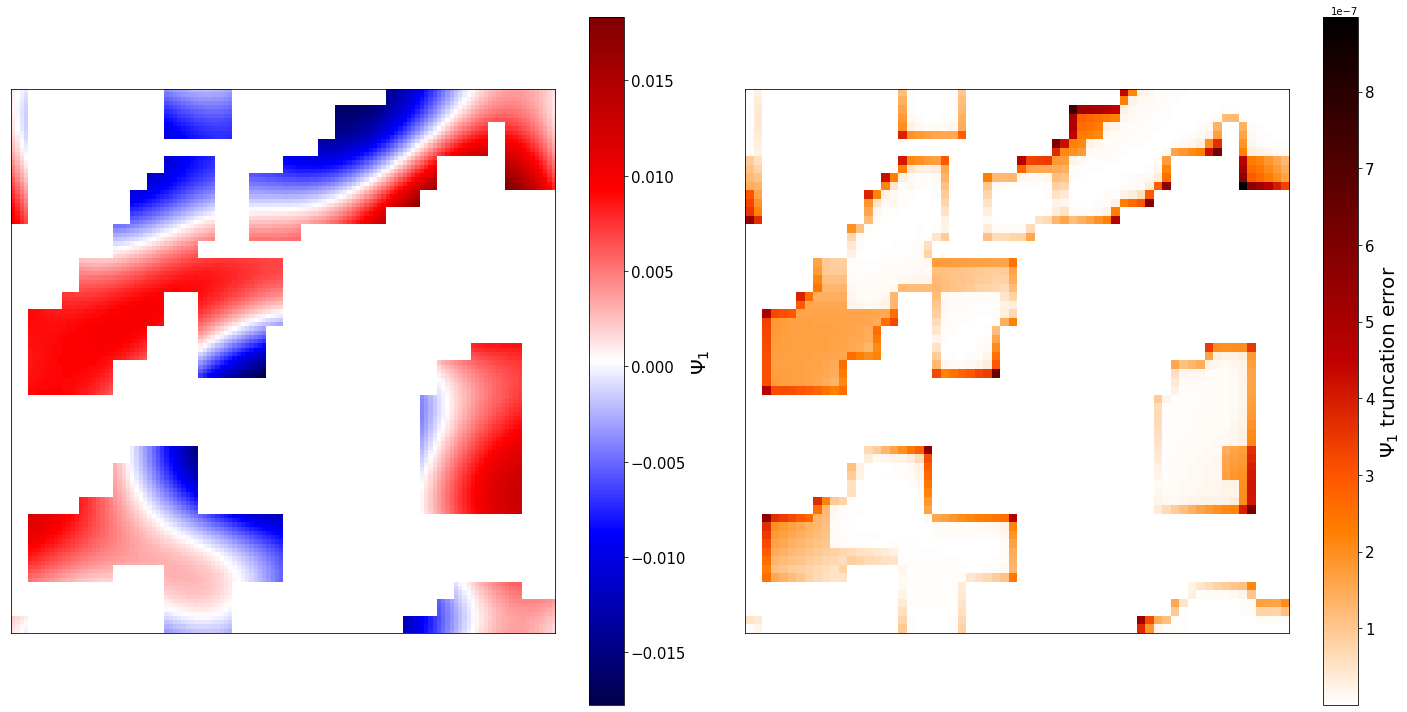

In [10]:
# Id of slice to be plotted.
i = 1
level = 1

# Read a slice along the x-axis.
slices = out.GetFullBoxTruncationError(i, level, ['Psi1'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

im = ax[0].imshow(slices['Psi1'][0], cmap='seismic')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(slices['Psi1_truncation_error'][0], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'$\Psi_1$ truncation error',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

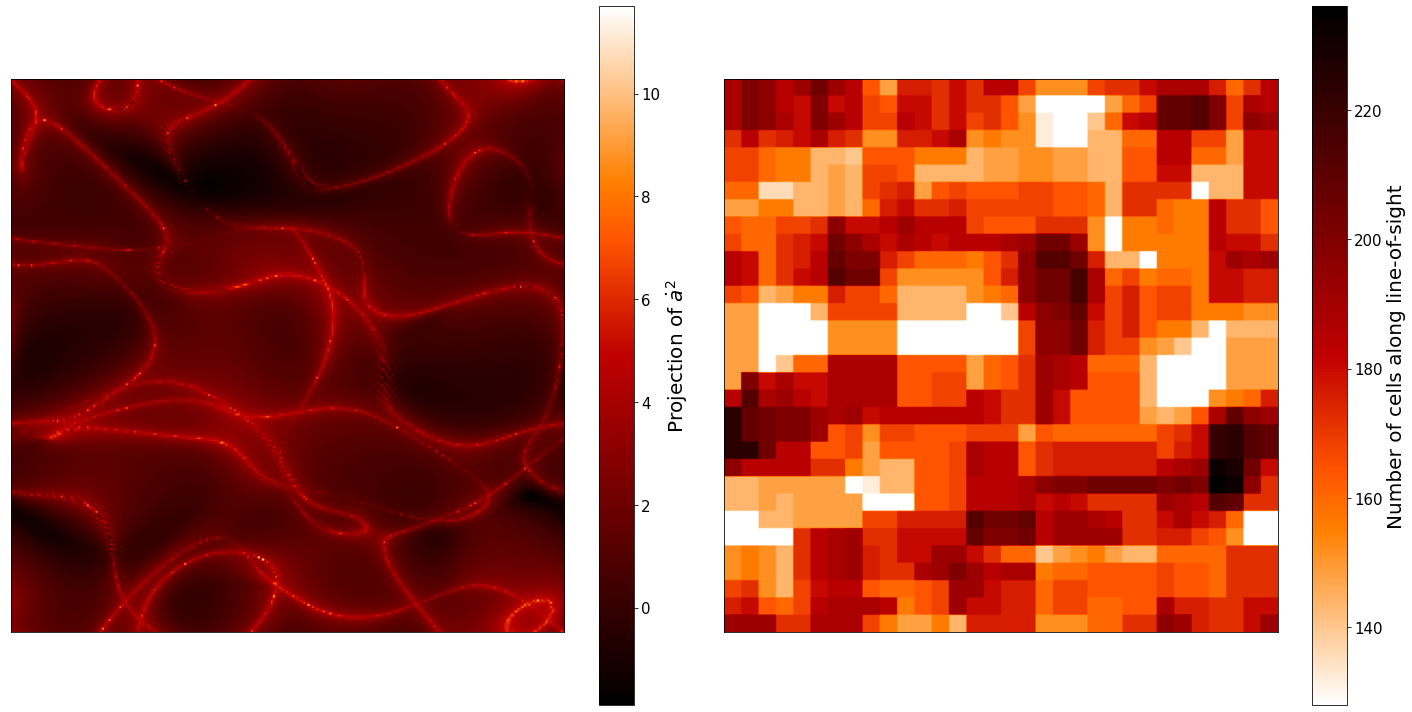

In [11]:
# Id of projection to be plotted.
i = 5

# Read a slice along the x-axis.
projection   = out.GetProjection(i, ['a_prime2'])
projection_n = out.GetProjectionN(i, ['a_prime2'])
t = slices['t']

# Plot.
fig, ax = plt.subplots(figsize=(20,10), ncols=2)

im = ax[0].imshow(np.log(projection['a_prime2']), cmap='gist_heat')
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Projection of $\dot{a}^2$',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(projection_n['a_prime2'], cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label=r'Number of cells along line-of-sight',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

Text(0, 0.5, '$\\rho_k$')

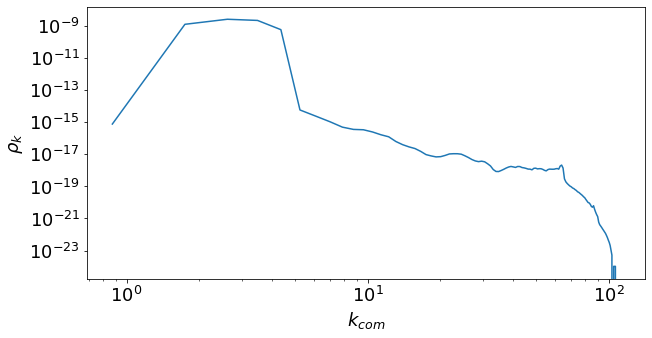

In [34]:
i = 1

# Read a slice along the x-axis.
unbinned_spectra   = out.GetSpectrum(i, ['a_prime_screened'])
eta = unbinned_spectra['t']

# Bin the unbinned spectra.
k_mag = np.sqrt(unbinned_spectra['k_sq'])
k_bins = np.linspace(0, k_mag[-1], 128)
spectrum = np.histogram(k_mag, bins = k_bins, weights = unbinned_spectra['a_prime_screened'])[0]

# Plot.
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(k_bins[1:], spectrum/eta**2)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$k_{com}$",fontsize=18)
plt.ylabel(r"$\rho_k$",fontsize=18)

In [30]:
spectrum

array([4.71983184e-15, 2.95329668e-08, 1.04402114e-08, 1.05326297e-14,
       1.26375636e-15, 5.00459802e-16, 1.40761629e-16, 1.19182711e-16,
       1.10549876e-16, 4.26416900e-17, 1.08972112e-18, 8.34459802e-21,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      